In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Reading the dataset
df = pd.read_csv(r"""Algerian Cleanned dataset.csv""")

In [44]:
# Remove Unusual columns
df.drop('Unnamed: 0',axis = 1, inplace=True)

In [45]:
# Showing the dataset
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,Sidi Bel-abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,Sidi Bel-abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,Sidi Bel-abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,Sidi Bel-abbes,2012-09-29


## Now perform basic EDA Operation

In [46]:
# Looking into general statistical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
Classes,244.0,0.565574,0.496700,0.0,0.000,1.00,1.000,1.0


In [47]:
# Checking is null value is present or not
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

In [48]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


In [49]:
# Dropping the unnexessary column DC
df.drop(['DC'],axis=1, inplace = True)

In [50]:
# Checking column types
df.dtypes

Temperature      int64
RH               int64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
ISI            float64
BUI            float64
FWI             object
Classes        float64
Region          object
Date            object
dtype: object

In [51]:
# In FWI column there is a row where it's 
# value is non-reliable to the other dataser
# Remove that row
df[df['FWI'] == 'fire   ']

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
165,37,37,18.0,0.2,88.9,12.9,12.5,10.4,fire,1.0,Sidi Bel-abbes,2012-07-14


In [52]:
# Getting targeted row index
targetted_rowIndex = df[df['FWI'] == 'fire   '].index[0]
targetted_rowIndex

165

In [53]:
# Dropping particular row
df.drop(targetted_rowIndex, inplace=True)

In [54]:
# Change FWI column type from str to float
df['FWI'] = df['FWI'].astype(float)

In [55]:
# Converting date column to specific date_time
df['Date'] = pd.to_datetime(df['Date'])

## After cleaned data

In [56]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,6.5,1.0,Sidi Bel-abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,0.0,Sidi Bel-abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.2,0.0,Sidi Bel-abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.7,0.0,Sidi Bel-abbes,2012-09-29


## Separating Dependent and Independent Features

In [57]:
# Getting Dependent Feature Temperature
y = df.iloc[:,0]

In [58]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

In [59]:
# Getting Independent Features. Numerical Columns except temp
X = df.iloc[:, 1:-2]

In [60]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.5,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.1,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,6.5,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.2,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.7,0.0


## Splitting Data with Training and Test dataset

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=310)

In [63]:
# Independent training dataset
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
127,54,11.0,0.1,83.7,8.4,3.1,9.3,3.1,1.0
41,75,13.0,0.1,75.1,7.9,1.5,9.2,0.9,0.0
95,73,17.0,0.1,68.4,1.9,1.4,2.9,0.5,0.0
16,89,16.0,0.6,37.3,1.1,0.0,1.6,0.0,0.0
178,87,18.0,0.0,80.0,11.8,2.8,11.8,3.2,0.0
...,...,...,...,...,...,...,...,...,...
144,59,16.0,0.8,74.2,7.0,1.6,6.7,0.8,0.0
72,51,13.0,0.3,81.3,15.6,2.5,20.7,4.2,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.4,0.0
93,86,15.0,10.1,30.5,0.7,0.0,1.1,0.0,0.0


In [64]:
# Dependent training dataset
y_train

127    35
41     31
95     29
16     30
178    29
       ..
144    33
72     35
1      29
93     22
124    29
Name: Temperature, Length: 157, dtype: int64

In [65]:
# Independent test dataset
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
123,73,13.0,4.0,55.7,2.7,0.6,2.9,0.2,0.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,6.4,1.0
100,77,15.0,1.0,56.1,2.1,0.7,2.6,0.2,0.0
227,81,15.0,0.0,84.6,12.6,4.3,14.3,5.7,1.0
73,63,15.0,0.0,87.0,19.0,5.9,24.4,10.2,1.0
...,...,...,...,...,...,...,...,...,...
94,78,15.0,3.8,42.6,1.2,0.1,1.7,0.0,0.0
133,58,17.0,0.0,88.9,21.3,8.7,21.2,12.9,1.0
78,54,18.0,0.0,89.4,20.0,9.7,27.5,16.1,1.0
21,67,17.0,0.1,79.1,7.0,2.4,9.7,2.3,0.0


In [66]:
# Dependent test dataset
y_test

123    30
153    33
100    30
227    28
73     35
       ..
94     25
133    27
78     36
21     31
116    26
Name: Temperature, Length: 86, dtype: int64

In [67]:
# Training dataset size
X_train.shape, y_train.shape

((157, 9), (157,))

In [68]:
# Test dataset size
X_test.shape, y_test.shape

((86, 9), (86,))

## Feature Scaling or Standarize the dataset

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
scaler

StandardScaler()

In [71]:
# Apply scaler on training dataset
X_train = scaler.fit_transform(X_train)

In [72]:
# Apply scaler on test dataset
X_test = scaler.transform(X_test)

## to avoid data leaking we use transform
## instead of fit_transform

## Model training

### 1) Linear Regression Model

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
l_reg = LinearRegression()

In [75]:
l_reg.fit(X_train, y_train)

LinearRegression()

#### 👉 Coefficients and Intercepts

In [76]:
## Getting coefficient
l_reg.coef_

## Regression Coefficients tell us how much a dependent variable 
## changes with a unit change in the independent variables.

array([-1.12730494, -0.43036827,  0.01429553,  1.40849695, -0.3957393 ,
       -0.0874176 ,  0.5121844 ,  0.6195334 , -0.04843489])

In [77]:
# Getting intercept
l_reg.intercept_

# If all the independent features are 0, then Temperature of
# the Region is 32.31 acc to the model

32.318471337579616

#### 🔮 Prediction with test data

In [78]:
l_reg_pred = l_reg.predict(X_test)
l_reg_pred

array([29.05422282, 33.90822001, 28.47192524, 31.3159913 , 33.44313986,
       31.25698524, 30.48514187, 27.8278896 , 33.02183298, 27.90657055,
       33.92192087, 32.60746271, 36.68332997, 27.15416099, 31.14867497,
       36.77565103, 27.32555075, 36.40838678, 33.15332267, 30.35202477,
       34.33512149, 26.26144535, 29.38467977, 32.39526205, 33.28903184,
       34.17459513, 30.90838562, 33.72575271, 26.46460053, 30.01738408,
       32.56827804, 34.97138035, 34.97806893, 32.00888687, 37.59316449,
       30.4610368 , 32.71269099, 31.13975665, 32.86367467, 32.20290668,
       32.01590834, 30.94468961, 35.44937131, 29.32697074, 29.46399819,
       31.91634359, 33.01053815, 26.84297885, 32.11827811, 36.46284937,
       30.11309506, 34.81802184, 32.15651931, 28.61349269, 34.45959621,
       32.83093713, 32.14375296, 28.51226814, 28.94758512, 37.22004524,
       26.28140435, 29.19576542, 37.43936309, 34.92229922, 31.17529838,
       31.55894698, 32.8411362 , 34.01329508, 33.41405736, 33.82

## Assumtions for linear regression

### To check whether the model is good or bad that trained

Text(0, 0.5, 'Test Predicted data')

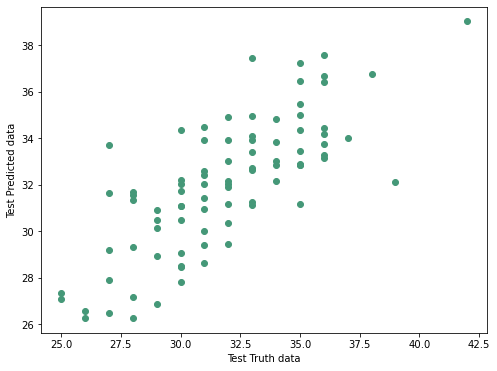

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, l_reg_pred,c='#459878')
plt.xlabel('Test Truth data')
plt.ylabel('Test Predicted data')

#### Result: As the graph showing linear relation, so the model is good

### Residuals: Getting the diff between test truth data and test predicted data

#### Objective: Calculate the error between them

In [80]:
residuals = y_test - l_reg_pred
residuals

123    0.945777
153   -0.908220
100    1.528075
227   -3.315991
73     1.556860
         ...   
94    -2.098934
133   -6.695272
78     1.566841
21    -0.418205
116   -0.577986
Name: Temperature, Length: 86, dtype: float64

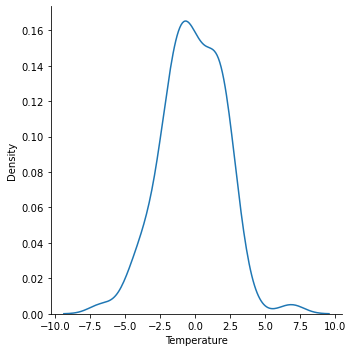

In [81]:
# Distribution of residuals
sns.displot(residuals, kind='kde')

#### Observation: 
- It's a mostly gussian distribution
- Somewhat left skewed due to outliers

## Scatter plot of Prediction and residuals

Text(0, 0.5, 'Residuals')

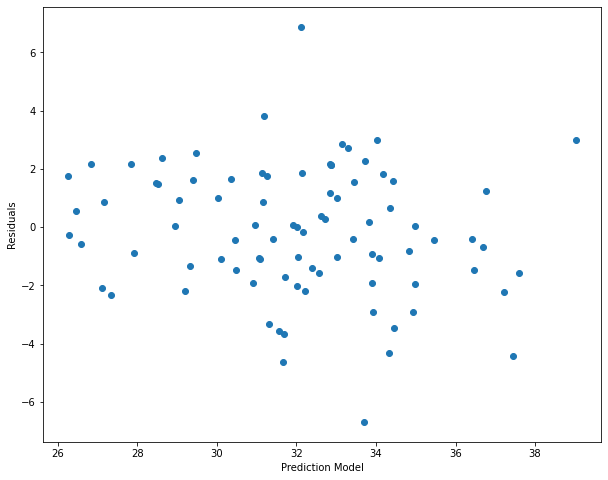

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(l_reg_pred, residuals)
plt.xlabel('Prediction Model')
plt.ylabel('Residuals')

#### Observation
- Performing a uniform distribution
- 'Homoscedasticity', or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared.

#### 4) Performance Metrices for Regression

- MSE, MAE, RMSE, R Squard and Adjusted R square

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [87]:
# MSE - Useful when having no outliers
mean_squared_error(y_test, l_reg_pred)

4.798732320234188

In [88]:
# MAE - If dataset have outliers, use this
mean_absolute_error(y_test, l_reg_pred)

1.7456438311799019

In [90]:
np.sqrt(mean_squared_error(y_test, l_reg_pred))

2.190600903915222

#### Getting R Squard and Adjusted R Squard Error

In [93]:
from sklearn.metrics import r2_score
score = r2_score(y_test, l_reg_pred)
print(f'R Squard: {score}')

R Squard: 0.5633060888554371


In [95]:
adjusted_R_squard = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
print(f'Adjusted R Squard: {adjusted_R_squard}')

Adjusted R Squard: 0.5115923362198967


#### Observation: Adjusted R squard always less than R squard value

## Ridge Regression

In [97]:
from sklearn.linear_model import Ridge

In [98]:
ridge_model = Ridge()

In [99]:
ridge_model.fit(X_train, y_train)

Ridge()

#### Print Coefficient and Intercepts

In [100]:
ridge_model.intercept_

32.318471337579616

In [101]:
ridge_model.coef_

array([-1.11858594, -0.42636392,  0.00756243,  1.37547605, -0.23848455,
       -0.0205988 ,  0.40708432,  0.51774729, -0.02776794])

In [102]:
ridge_pred = ridge_model.predict(X_test)

In [103]:
ridge_pred

array([29.05050009, 33.92176686, 28.48112429, 31.33698802, 33.417068  ,
       31.25028412, 30.48523068, 27.84028285, 33.00562657, 27.95097955,
       33.91347932, 32.58224918, 36.66424743, 27.15480354, 31.21187494,
       36.78588239, 27.32268917, 36.40869684, 33.18156172, 30.36657029,
       34.2415886 , 26.32001007, 29.39770983, 32.4168807 , 33.26060858,
       34.19921337, 30.91776342, 33.73899513, 26.52524533, 30.00043782,
       32.57311255, 34.93640404, 34.93616139, 31.99125646, 37.61129975,
       30.4797237 , 32.76413592, 31.18818658, 32.87145571, 32.21499932,
       32.02927705, 31.00556755, 35.44975531, 29.32855334, 29.46666479,
       31.91159171, 33.02454951, 26.89010778, 32.12869114, 36.38229469,
       30.09411219, 34.83477327, 32.17325303, 28.62195391, 34.44709613,
       32.96016588, 32.17454689, 28.51712582, 28.95477008, 37.22369473,
       26.27189921, 29.19636504, 37.47187176, 34.90544417, 31.14403815,
       31.56750835, 32.85519481, 34.02580574, 33.39370687, 33.87

#### R-Squard and Adjusted R-Squard on Ridge model

In [106]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_pred)
print(f'Ridge R Squard: {score}')

R Squard: 0.5652639007207039


In [108]:
adjusted_R_squard = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
print(f'Ridge Adjusted R Squard: {adjusted_R_squard}')

Ridge Adjusted R Squard: 0.5137819942271029


## Lasso Regression

In [110]:
from sklearn.linear_model import Lasso

In [111]:
lasso_model = Lasso()

In [112]:
lasso_model.fit(X_train, y_train)

Lasso()

In [113]:
lasso_model.coef_

array([-0.67843382, -0.        , -0.        ,  1.13801899,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [114]:
lasso_model.intercept_

32.318471337579616

In [115]:
lasso_pred = lasso_model.predict(X_test)

In [116]:
lasso_pred

array([30.01749934, 33.6761871 , 29.86474062, 31.92072828, 32.93827544,
       31.87586746, 31.54032989, 30.053388  , 32.92834604, 29.56041235,
       33.49984745, 32.30032406, 34.60274614, 29.44361959, 31.92072828,
       34.762176  , 29.11689956, 34.1894081 , 33.04720788, 31.10452279,
       33.28754184, 28.22519464, 30.41726316, 32.15320193, 33.12263001,
       33.47174179, 31.89833652, 33.48984074, 29.06291196, 31.20218205,
       32.58226058, 33.6705505 , 33.22577124, 32.29825497, 35.04633623,
       31.43331191, 32.63728273, 31.82211179, 33.18773618, 32.44633433,
       32.28936012, 31.82076799, 34.37590908, 31.20774133, 30.21964362,
       32.54414821, 32.83045484, 28.720394  , 31.85466487, 33.87269478,
       31.55137114, 34.04228598, 32.33851374, 29.88157309, 33.3695578 ,
       32.64752137, 32.53732245, 30.01742203, 30.57788219, 34.49040081,
       28.92706302, 30.54858737, 34.5443111 , 33.77162264, 31.49190156,
       32.0578437 , 33.07983828, 33.29206658, 32.80012547, 33.25

#### R-Squard and Adjusted R-Squard on Lasso model

In [117]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_pred)
print(f'Lasso R Squard: {score}')

adjusted_R_squard = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
print(f'Lasso Adjusted R Squard: {adjusted_R_squard}')

Lasso R Squard: 0.4661814144558306
Lasso Adjusted R Squard: 0.40296605564138954


## Elastic Regression Model

In [119]:
from sklearn.linear_model import ElasticNet

In [121]:
elastic_model = ElasticNet()

In [123]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [124]:
elastic_model.coef_

array([-0.68448251, -0.05195235, -0.        ,  0.73597673,  0.08927311,
        0.2480418 ,  0.03998653,  0.22582511,  0.13911431])

In [125]:
elastic_model.intercept_

32.318471337579616

In [127]:
elastic_predict = elastic_model.predict(X_test)

#### R-Squard and Adjusted R-Squard on Elastic model

In [128]:
from sklearn.metrics import r2_score
score = r2_score(y_test, elastic_predict)
print(f'Elastic R Squard: {score}')

adjusted_R_squard = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
print(f'Elastic Adjusted R Squard: {adjusted_R_squard}')

Elastic R Squard: 0.49946540625010416
Elastic Adjusted R Squard: 0.44019157277972176


#### Adjusted R-Squard Value overview:
- LinearRegression    51.15%
- Ridge               51.37%
- Lasso               40.29%
- Elastic             44.01%

## Conclusion

#### Ridge Regression having the highest 'Adjusted R Squard value'(51.37%). So, we can consider 'Ridge Regression' is optimal model